# K-Nearest Neighbors (Cats or Dogs Prediction)

## Explanation

### Objective

Create a machine learning model that can predict whether the data is a characteristic of a cat or dog, using the KNN (K-Nearest Neighbors) algorithm.

### Columns

- Height = Height of the animal (in cm).
- Weight = Weight of the animal (in kg).
- Length = Length of the animal (in cm).
- Fur Length = Fur length categorized as 0 (Short), 1 (Medium), or 2 (Long).
- Paw Size = Paw size categorized as 0 (Small), 1 (Medium), or 2 (Large).
- Ear Shape = Ear shape categorized as 0 (Round), 1 (Fluffy), or 2 (Triangular).
- Animal (Target Label) = The animal type, where 0 represents Cat and 1 represents Dog.

## A. Data Preparation

### A.1 Import Libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [128]:
try:
    df = pd.read_csv("CatsAndDogs_v2.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [129]:
df.shape

(49, 7)

### A.4 Viewing Data Informations

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height     49 non-null     int64
 1   Weight     49 non-null     int64
 2   Length     49 non-null     int64
 3   FurLength  49 non-null     int64
 4   PawSize    49 non-null     int64
 5   EarShape   49 non-null     int64
 6   Animal     49 non-null     int64
dtypes: int64(7)
memory usage: 2.8 KB


### A.5 Viewing Top 5 Data and Bottom 5 Data

In [131]:
df.head()

,Height,Weight,Length,FurLength,PawSize,EarShape,Animal
0,25,4,30,0,0,0,0
1,32,6,38,1,1,2,0
2,38,8,45,2,2,1,1
3,28,5,35,0,0,0,0
4,35,7,42,1,1,2,1


In [132]:
df.tail()

,Height,Weight,Length,FurLength,PawSize,EarShape,Animal
44,50,20,80,2,2,1,1
45,42,15,65,1,1,1,1
46,38,12,55,1,1,1,1
47,30,6,36,0,0,0,0
48,35,7,42,1,1,2,1


### A.6 Viewing Data Statistics

In [133]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Height,49.00,34.51,8.24,25.00,30.00,32.00,36.00,65.00
Weight,49.00,9.39,6.44,4.00,6.00,7.00,10.00,35.00
Length,49.00,44.61,17.16,30.00,36.00,40.00,43.00,110.00
FurLength,49.00,0.94,0.72,0.00,0.00,1.00,1.00,2.00
PawSize,49.00,0.94,0.72,0.00,0.00,1.00,1.00,2.00
EarShape,49.00,1.10,0.82,0.00,0.00,1.00,2.00,2.00
Animal,49.00,0.61,0.57,0.00,0.00,1.00,1.00,2.00


### A.7 Viewing Duplicated Data

In [134]:
df.duplicated().sum()

np.int64(9)

In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [137]:
df.isna().sum()

Height       0
Weight       0
Length       0
FurLength    0
PawSize      0
EarShape     0
Animal       0
dtype: int64

### A.9 Viewing Outliers

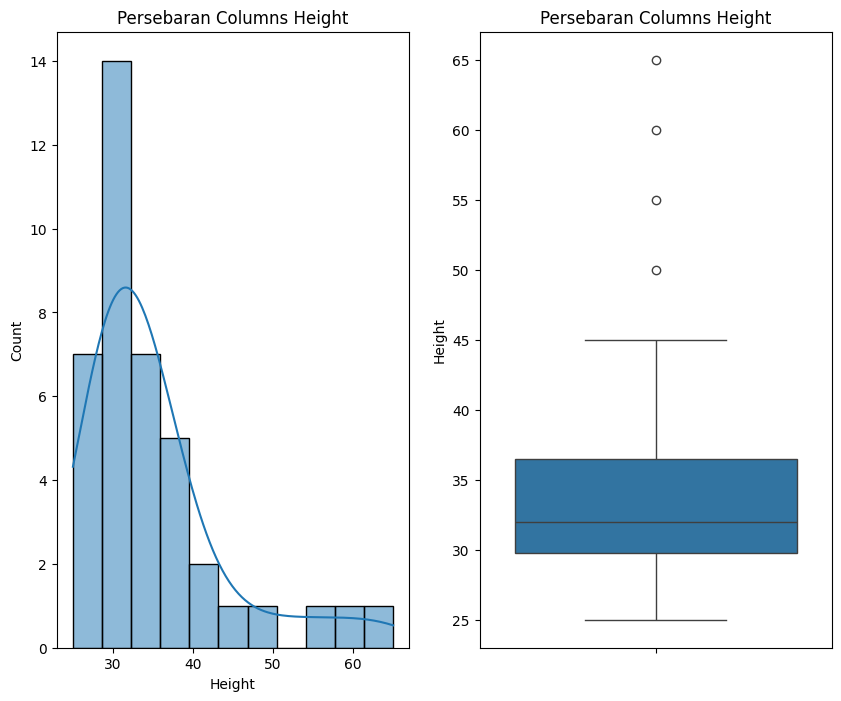

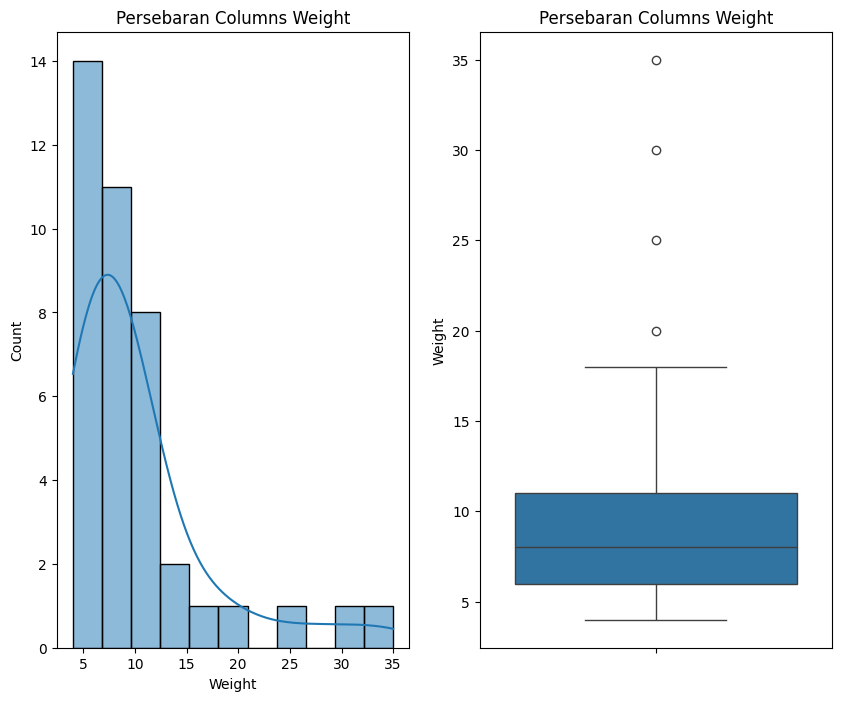

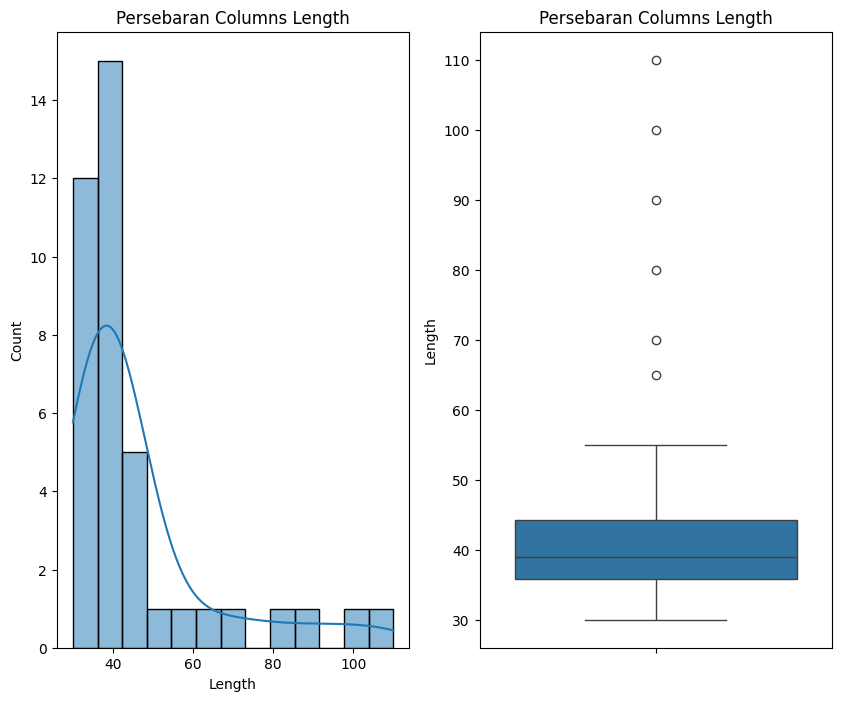

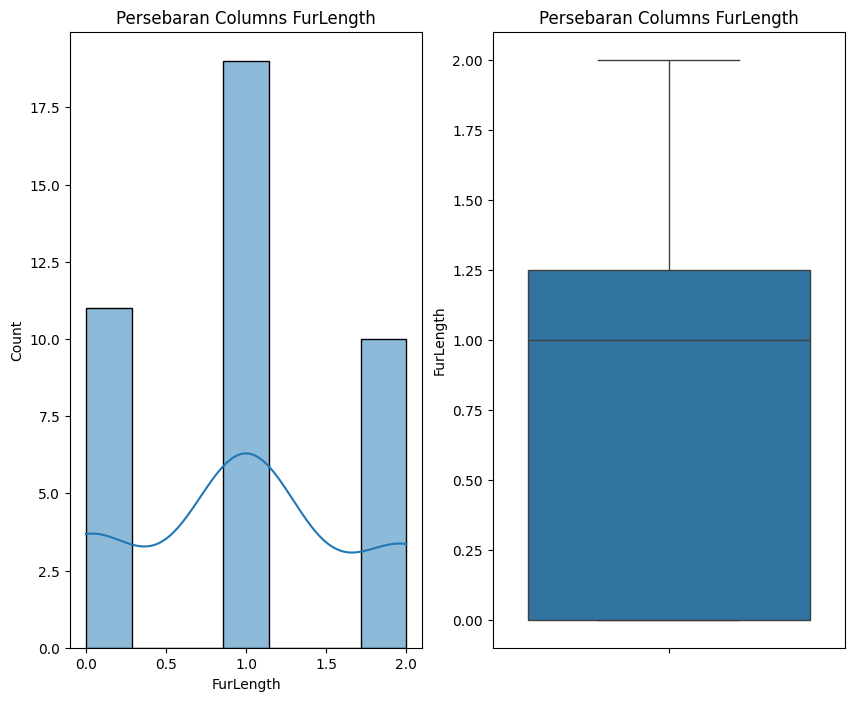

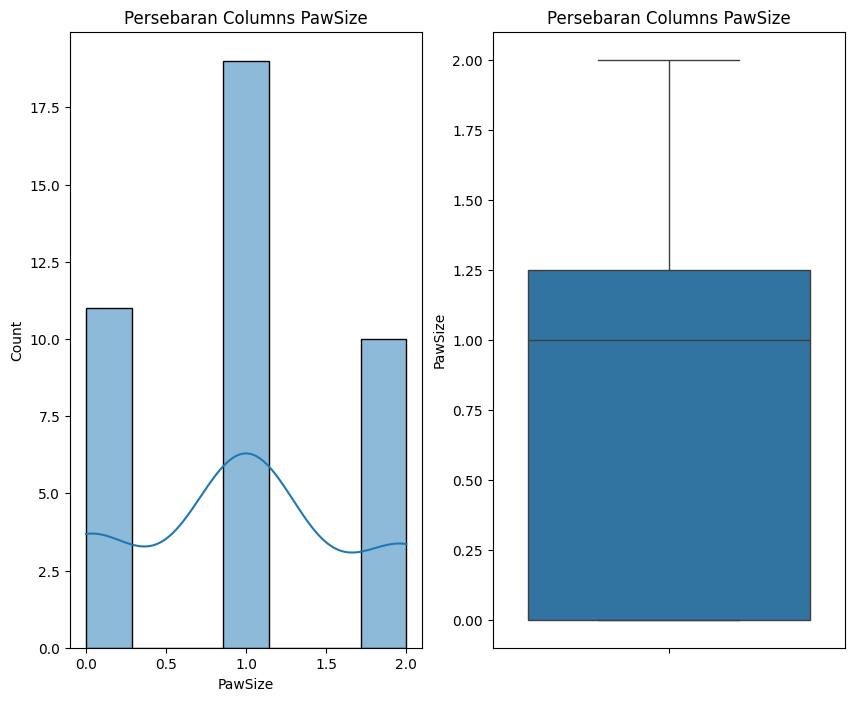

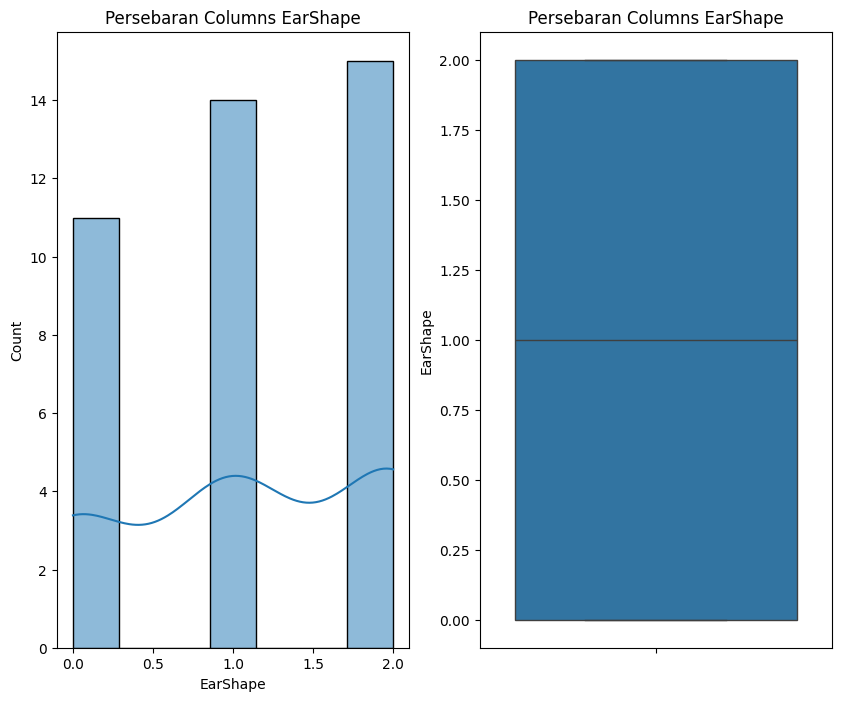

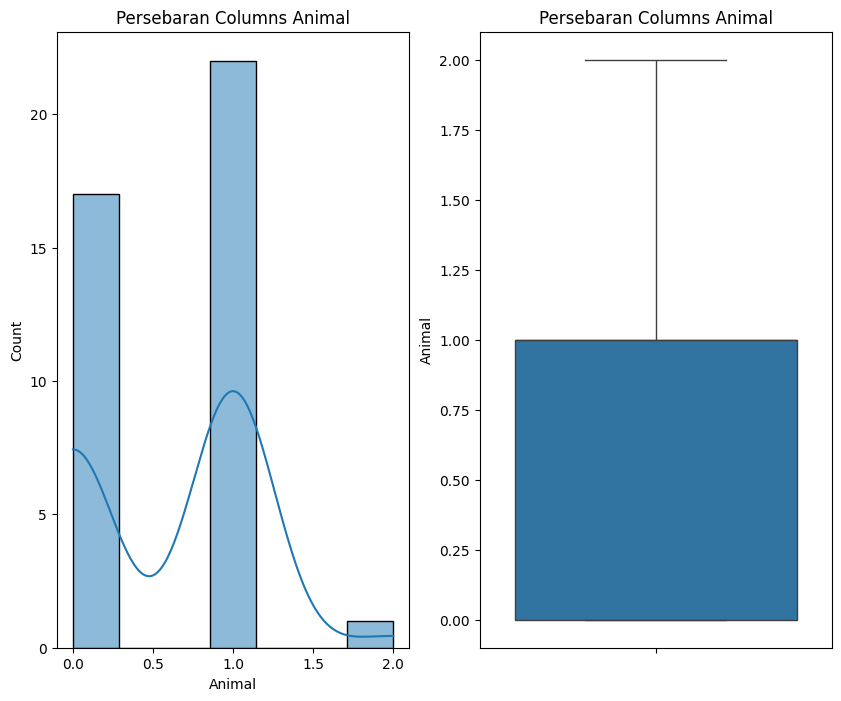

In [138]:
for col in df.select_dtypes(include='number'):
 fig, axes = plt.subplots(1,2, figsize=(10, 8))
 sns.histplot(df[col],kde = True, ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")

## B. Data Preprocessing

### B.1 Handling Outliers

In [139]:
num = df.select_dtypes(include=['number']).columns

for col in num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    
    df = df[(df[col] >= low) & (df[col] <= up)]

### B.2 Handling Irrelevant Label

In [140]:
df['Animal'].unique()

array([0, 1, 2])

In [141]:
df = df[df['Animal'] != 2]

df.reset_index(drop=True, inplace=True)

## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

In [142]:
animal_map = {0 : "Cats", 1 : "Dogs"}
df['Animal_Name'] = df['Animal'].map(animal_map)

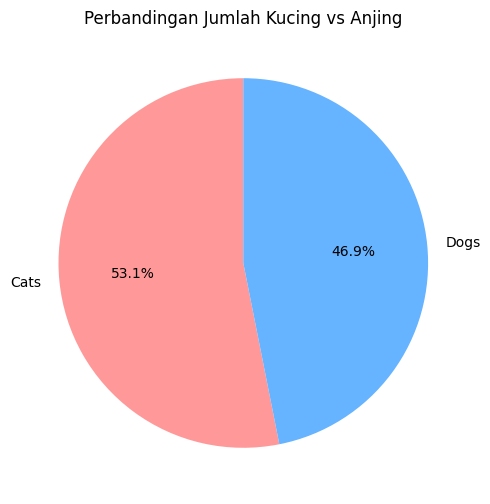

In [143]:
plt.figure(figsize=(6, 6))
df['Animal_Name'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Perbandingan Jumlah Kucing vs Anjing')
plt.ylabel(None)
plt.show()

### C.2 Bivariate Analysis

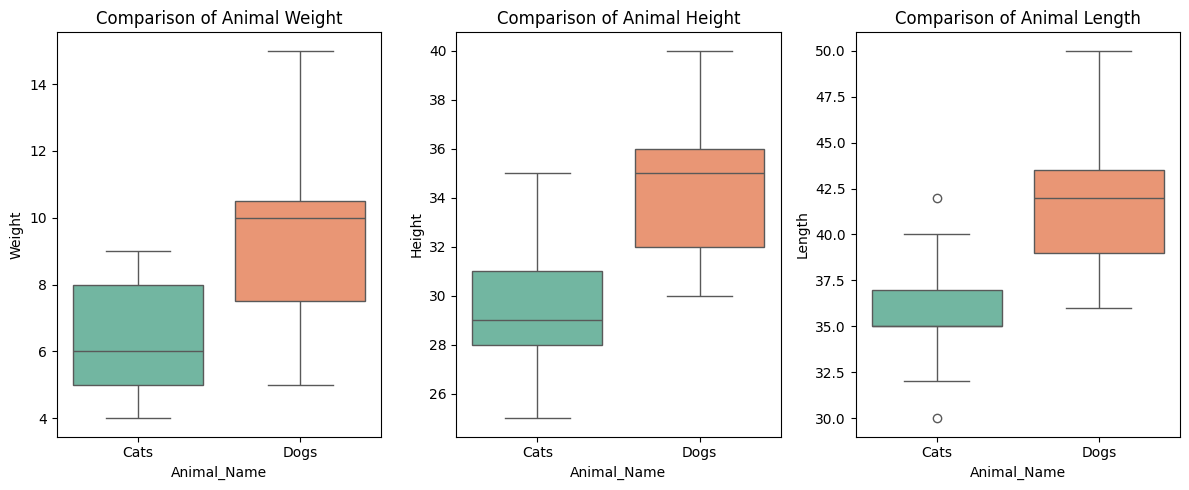

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(x='Animal_Name', y='Weight', data=df, ax=axes[0], palette='Set2', legend=False, hue='Animal_Name')
axes[0].set_title('Comparison of Animal Weight')

sns.boxplot(x='Animal_Name', y='Height', data=df, ax=axes[1], palette='Set2', legend=False, hue='Animal_Name')
axes[1].set_title('Comparison of Animal Height')

sns.boxplot(x='Animal_Name', y='Length', data=df, ax=axes[2], palette='Set2', legend=False, hue='Animal_Name')
axes[2].set_title('Comparison of Animal Length')

plt.tight_layout()
plt.show()

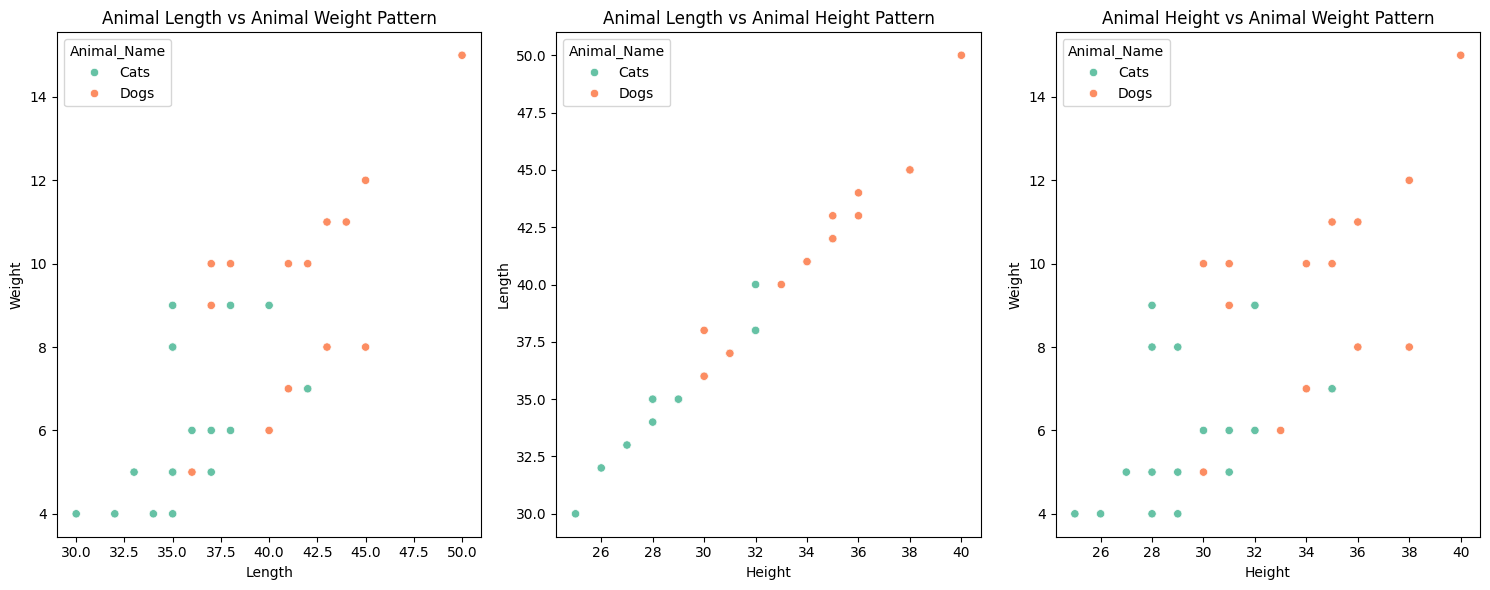

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.scatterplot(x='Length', y='Weight', data=df, ax=axes[0], palette='Set2', hue='Animal_Name')
axes[0].set_title('Animal Length vs Animal Weight Pattern')

sns.scatterplot(x='Height', y='Length', data=df, ax=axes[1], palette='Set2', hue='Animal_Name')
axes[1].set_title('Animal Length vs Animal Height Pattern')

sns.scatterplot(x='Height', y='Weight', data=df, ax=axes[2], palette='Set2', hue='Animal_Name')
axes[2].set_title('Animal Height vs Animal Weight Pattern')

plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

<Axes: >

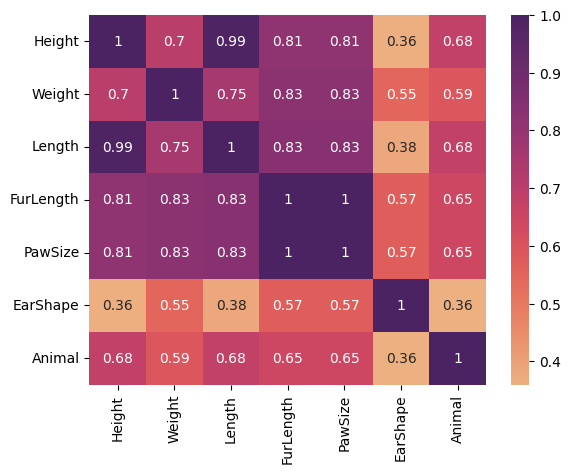

In [146]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="flare")

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [147]:
X_data = df.drop(columns=['Animal_Name', 'Animal'])
y_data = df['Animal']

### D.2 Normalize Features

In [148]:
X_data = (X_data - X_data.min()) / (X_data.max() - X_data.min())

In [149]:
df.head()

,Height,Weight,Length,FurLength,PawSize,EarShape,Animal,Animal_Name
0,25,4,30,0,0,0,0,Cats
1,32,6,38,1,1,2,0,Cats
2,38,8,45,2,2,1,1,Dogs
3,28,5,35,0,0,0,0,Cats
4,35,7,42,1,1,2,1,Dogs


### D.3 Splitting Train Data and Test Data (80:20)

In [150]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.4 K-Nearest Neighbors Model

In [151]:
class KNN:
    def __init__(self, k, p):
        self.k = k
        self.p = p
        
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, x1, x2):
        if self.p == 1:
            return np.sum(np.abs(x1 - x2))
        elif self.p == 2:
            return np.sqrt(np.sum(x1 - x2) ** 2)
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        dists = [self.distance(x, x_train) for x_train in self.X_train]
        best_k = np.argsort(dists)[:self.k]
        label_k = [self.y_train[i] for i in best_k]
        winner = max(set(label_k), key=label_k.count)
        return winner

### D.5 Grid-Search (Finding Optimal K and Distance Method)

In [152]:
print("| Accuracy | K | Distance |")
best_acc = 0
best_k = 0
best_p = 0
k_lists = [3, 5, 7, 9, 11, 13, 15]
p_lists = [1, 2]


for k in k_lists:
    for p in p_lists:
        model = KNN(k, p)
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        acc = np.mean(pred == y_test.values)
        
        dist = "Manhattan" if p == 1 else "Euclidean"
        print(f"| {acc} | {k} | {dist} |")
        
        if acc > best_acc:
            best_acc = acc
            best_k = k
            best_p = dist
    
print(f"Best Accuracy: {best_acc} | Best K: {best_k} | Best Distance: {best_p}")      

| Accuracy | K | Distance |
| 0.7142857142857143 | 3 | Manhattan |
| 1.0 | 3 | Euclidean |
| 0.7142857142857143 | 5 | Manhattan |
| 0.8571428571428571 | 5 | Euclidean |
| 0.8571428571428571 | 7 | Manhattan |
| 0.8571428571428571 | 7 | Euclidean |
| 0.8571428571428571 | 9 | Manhattan |
| 0.7142857142857143 | 9 | Euclidean |
| 0.8571428571428571 | 11 | Manhattan |
| 0.7142857142857143 | 11 | Euclidean |
| 0.8571428571428571 | 13 | Manhattan |
| 0.8571428571428571 | 13 | Euclidean |
| 0.8571428571428571 | 15 | Manhattan |
| 0.8571428571428571 | 15 | Euclidean |
Best Accuracy: 1.0 | Best K: 3 | Best Distance: Euclidean


### D.6 Elbow Method (Checking Optimal K)

#### Euclidean Distance

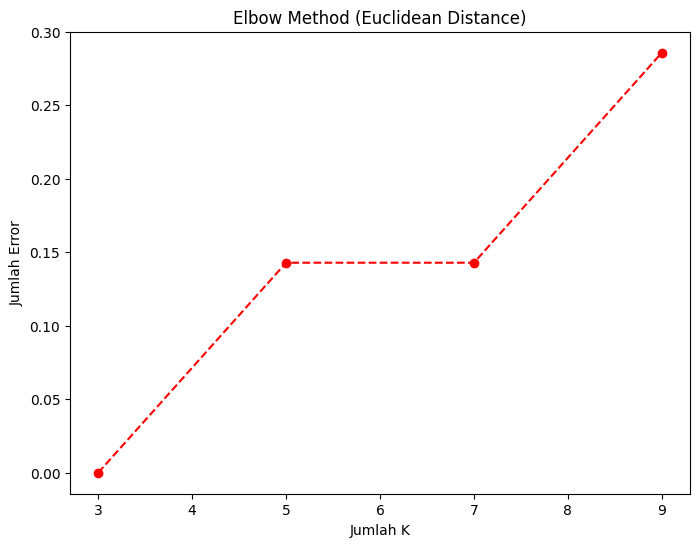

In [153]:
errors = []
range_k = [3, 5, 7, 9]

for k in range_k:
        model = KNN(k, 2)
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
plt.figure(figsize=(8,6))
plt.plot(range_k, errors, marker='o', linestyle='--', color='red')
plt.title("Elbow Method (Euclidean Distance)")
plt.xlabel("Jumlah K")
plt.ylabel("Jumlah Error")
plt.show()

#### Manhattan Distance

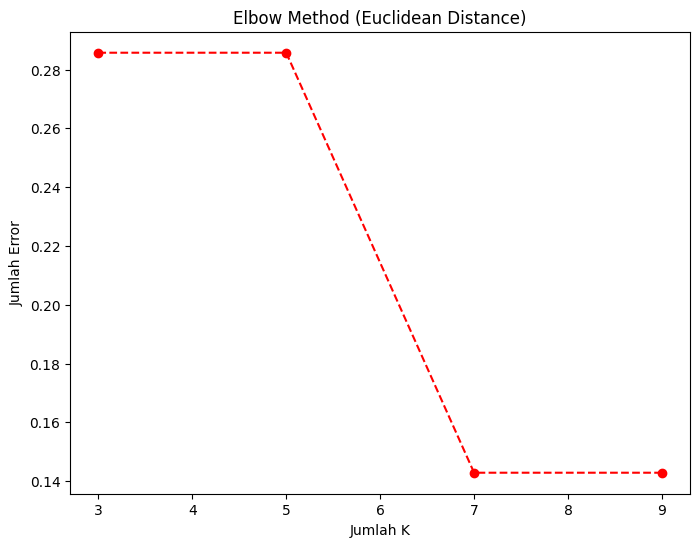

In [154]:
errors = []
range_k = [3, 5, 7, 9]

for k in range_k:
        model = KNN(k, 1)
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
plt.figure(figsize=(8,6))
plt.plot(range_k, errors, marker='o', linestyle='--', color='red')
plt.title("Elbow Method (Euclidean Distance)")
plt.xlabel("Jumlah K")
plt.ylabel("Jumlah Error")
plt.show()

### D.7 Checking Overfit K (Finding Optimum Gap)

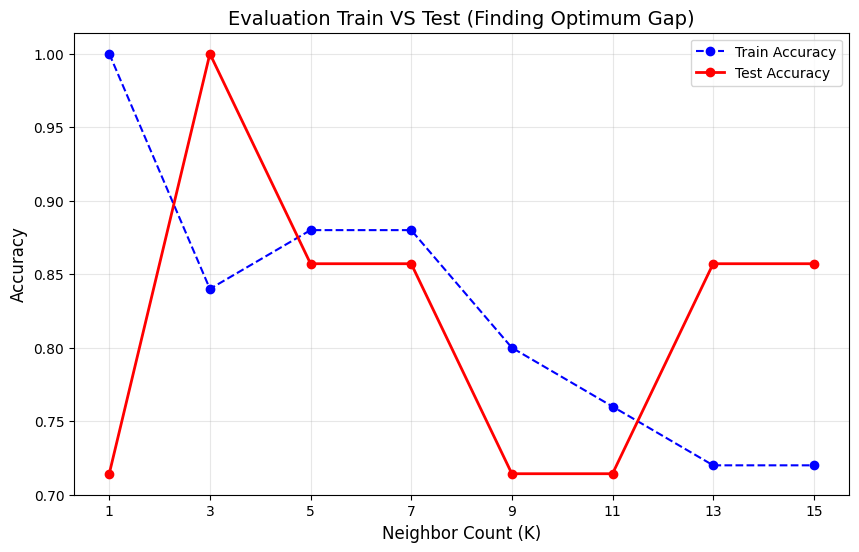

In [187]:
train_accuracies = []
test_accuracies = []

k_values = [1, 3, 5, 7, 9, 11, 13, 15]

for k in k_values:
    model = KNN(k=k, p=2) 
    model.train(X_train.values, y_train.values)
    
    train_pred = model.predict(X_train.values)
    train_acc = np.mean(train_pred == y_train.values)
    train_accuracies.append(train_acc)
    
    test_pred = model.predict(X_test.values)
    test_acc = np.mean(test_pred == y_test.values)
    test_accuracies.append(test_acc)
    
    
plt.figure(figsize=(10, 6))

plt.plot(k_values, train_accuracies, marker='o', linestyle='--', color='blue', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', linewidth=2, color='red', label='Test Accuracy')

plt.title('Evaluation Train VS Test (Finding Optimum Gap)', fontsize=14)
plt.xlabel('Neighbor Count (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## E. Evaluation

In [156]:
model = KNN(5, 2)
model.train(X_train.values, y_train.values)

In [157]:
y_pred_test = model.predict(X_test.values)

In [158]:
y_pred_train = model.predict(X_train.values)

### E.1 Model Accuracy

#### Test Accuracy

In [159]:
test_accuracy = np.mean(y_pred_test == y_test.values)
test_accuracy

np.float64(0.8571428571428571)

#### Train Accuracy

In [160]:
train_accuracy = np.mean(y_pred_train == y_train.values)
train_accuracy

np.float64(0.88)

### E.2 Model Predict (Visual)

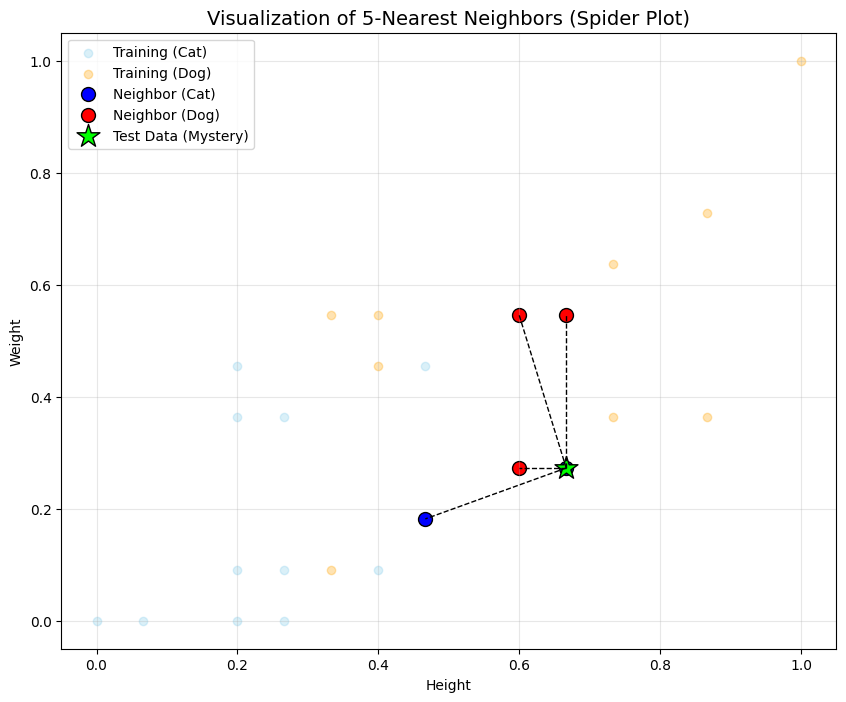

Test Data: Height=0.6666666666666666, Weight=0.2727272727272727
Nearest Neighbors:
- Cat Votes: 2
- Dog Votes: 3
-> Model Conclusion: DOG


In [198]:
def visualize_single_prediction(X_train, y_train, test_point, k=5):
    # SAFETY CHECK: Handle Pandas/Numpy data types safely
    if hasattr(X_train, 'values'): X_train = X_train.values
    if hasattr(y_train, 'values'): y_train = y_train.values
    if hasattr(test_point, 'values'): test_point = test_point.values
    
    # 1. Calculate Distance from Test Point to ALL Training Data
    # (Recalculate manually here for easier plotting)
    dists = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
    
    # 2. Find K Nearest Neighbors
    # argsort returns the INDICES of data with the smallest distances
    neighbor_indices = np.argsort(dists)[:k]
    
    # --- VISUALIZATION ---
    plt.figure(figsize=(10, 8))
    
    # A. Plot All Training Data (As Background - Faded Color)
    # Class 0 (Cat) = Light Blue, Class 1 (Dog) = Light Orange
    plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], 
                color='skyblue', alpha=0.3, label='Training (Cat)')
    plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], 
                color='orange', alpha=0.3, label='Training (Dog)')
    
    # B. Plot K-Nearest Neighbors (Bright Color & Larger Size)
    neighbors_X = X_train[neighbor_indices]
    neighbors_y = y_train[neighbor_indices]
    
    plt.scatter(neighbors_X[neighbors_y==0][:, 0], neighbors_X[neighbors_y==0][:, 1], 
                color='blue', s=100, edgecolor='black', label='Neighbor (Cat)')
    plt.scatter(neighbors_X[neighbors_y==1][:, 0], neighbors_X[neighbors_y==1][:, 1], 
                color='red', s=100, edgecolor='black', label='Neighbor (Dog)')
    
    # C. Plot TEST DATA (Big Star)
    plt.scatter(test_point[0], test_point[1], 
                color='lime', marker='*', s=300, edgecolor='black', label='Test Data (Mystery)')
    
    # D. DRAW LINES (Spider Lines) 🕸️
    # Loop through each neighbor, draw a line from Test Point to Neighbor
    for i in range(k):
        neighbor = neighbors_X[i]
        # Plot line from (x1, x2) to (y1, y2)
        plt.plot([test_point[0], neighbor[0]], [test_point[1], neighbor[1]], 
                 color='black', linestyle='--', linewidth=1)
        
    plt.title(f'Visualization of {k}-Nearest Neighbors (Spider Plot)', fontsize=14)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print Info Text for Clarity
    print(f"Test Data: Height={test_point[0]}, Weight={test_point[1]}")
    print("Nearest Neighbors:")
    cat_vote = np.sum(neighbors_y == 0)
    dog_vote = np.sum(neighbors_y == 1)
    print(f"- Cat Votes: {cat_vote}")
    print(f"- Dog Votes: {dog_vote}")
    print(f"-> Model Conclusion: {'DOG' if dog_vote > cat_vote else 'CAT'}")

# --- USAGE ---
# Pick 1 random test data sample (e.g., index 5)
sample_index = 5 

# Call the function
visualize_single_prediction(X_train, y_train, X_test.iloc[sample_index], k=5)

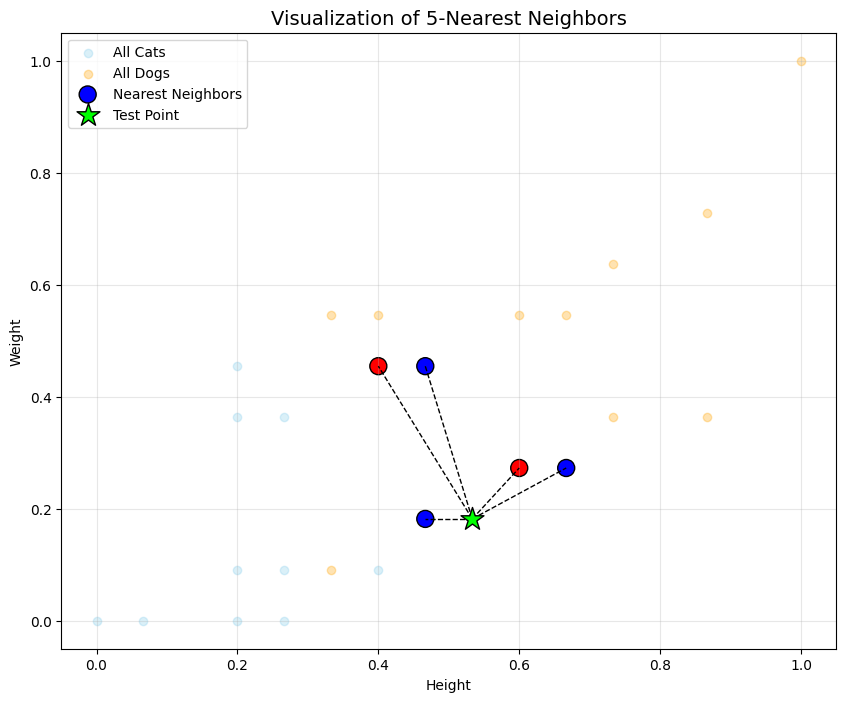

In [199]:
def visualize_knn_simple(X_train, y_train, test_point, k=5):
    # 1. SAFETY CHECK (One-liner for brevity)
    X_train = X_train.values if hasattr(X_train, 'values') else X_train
    y_train = y_train.values if hasattr(y_train, 'values') else y_train
    test_point = test_point.values if hasattr(test_point, 'values') else test_point
    
    # 2. CALCULATE DISTANCE & FIND NEIGHBORS
    dists = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
    neighbor_indices = np.argsort(dists)[:k]
    neighbors_X = X_train[neighbor_indices]
    neighbors_y = y_train[neighbor_indices]
    
    # 3. START PLOTTING
    plt.figure(figsize=(10, 8))
    
    # A. Draw Background (All Training Data)
    # Use loop to keep code short
    for label, color, name in [(0, 'skyblue', 'Cat'), (1, 'orange', 'Dog')]:
        subset = X_train[y_train == label]
        plt.scatter(subset[:, 0], subset[:, 1], color=color, alpha=0.3, label=f'All {name}s')
    
    # B. Draw Spider Lines
    # Drawn first so lines appear BEHIND the points
    for i in range(k):
        plt.plot([test_point[0], neighbors_X[i, 0]], [test_point[1], neighbors_X[i, 1]], 
                 color='black', linestyle='--', linewidth=1)
    
    # C. Draw Neighbor Points
    # Create automatic color list: If 0=Blue, 1=Red
    neighbor_colors = ['blue' if y == 0 else 'red' for y in neighbors_y]
    plt.scatter(neighbors_X[:, 0], neighbors_X[:, 1], c=neighbor_colors, 
                s=150, edgecolor='black', label='Nearest Neighbors')
    
    # D. Draw Test Data (Green Star)
    plt.scatter(test_point[0], test_point[1], color='lime', marker='*', 
                s=300, edgecolor='black', label='Test Point', zorder=10)
    
    # Graph Styling
    plt.title(f'Visualization of {k}-Nearest Neighbors', fontsize=14)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# --- USAGE ---
# Pick 1 random test data sample (e.g., index 6)
visualize_knn_simple(X_train, y_train, X_test.iloc[6], k=5)

### E.3 Confusion Matrix

In [161]:
pred_array = np.array(y_pred_test)
test_array = np.array(y_test)

TP = np.sum((pred_array == 1) & (test_array == 1))
FP = np.sum((pred_array == 1) & (test_array == 0))
FN = np.sum((pred_array == 0) & (test_array == 1))
TN = np.sum((pred_array == 0) & (test_array == 0))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

True Positives: 3
False Positives: 1
False Negatives: 0
True Negatives: 3


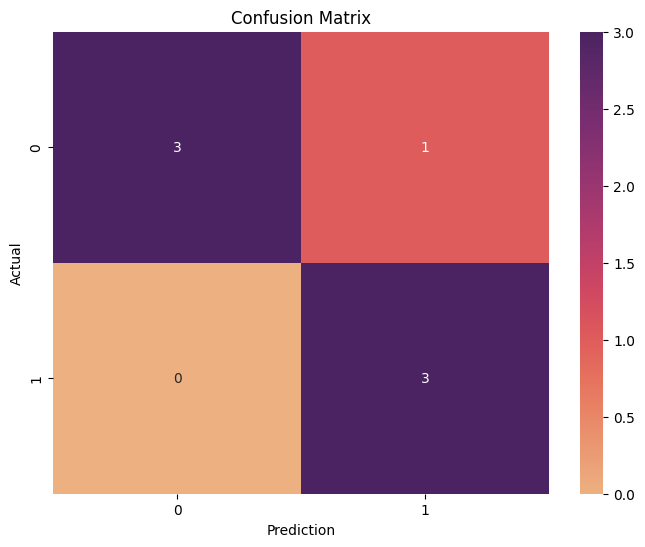

Class: Cats
True Positives: 3
False Positives: 0
False Negatives: 1
True Negatives: 3

Class: Dogs
True Positives: 3
False Positives: 1
False Negatives: 0
True Negatives: 3



In [162]:
confusion_matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        classes = "Cats"
    else:
        classes = "Dogs"
        
    print(f"Class: {classes}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### E.4 Precision

In [163]:
precision = TP / (TP + FP)
precision = np.mean(precision)
precision

np.float64(0.875)

### E.5 Recall

In [164]:
recall = TP / (TP + FN)
recall = np.mean(recall)
recall

np.float64(0.875)

### E.6 F-1 Score

In [165]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

np.float64(0.875)

### E.7 ROC-AUC Visualization

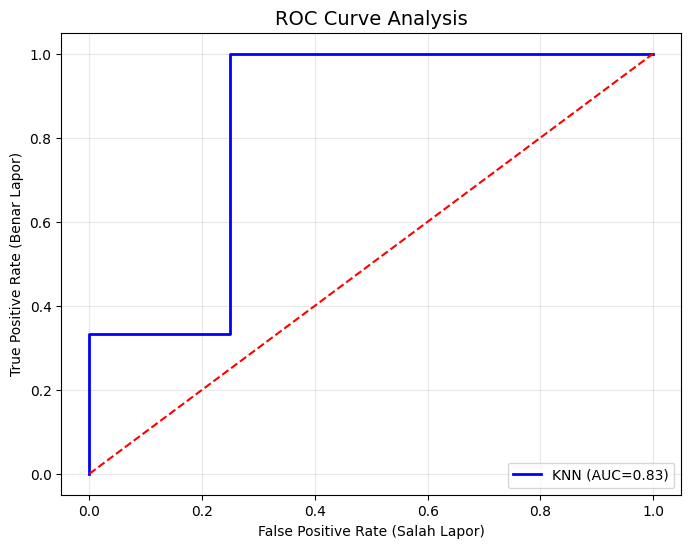

In [ ]:
# --- 1. Fungsi Hitung Keyakinan (Probabilitas) ---
def get_probabilities(X_train, y_train, X_test, k=5):
    if hasattr(X_train, 'values'):
        X_train = X_train.values
    if hasattr(y_train, 'values'):
        y_train = y_train.values
    if hasattr(X_test, 'values'):
        X_test = X_test.values
        
    probs = []
    # Loop setiap data test
    for row in X_test:
        # Hitung jarak ke semua data training (Euclidean)
        dists = np.sqrt(np.sum((X_train - row)**2, axis=1))
        
        # Ambil K tetangga terdekat
        idx_neighbors = np.argsort(dists)[:k]
        labels_neighbors = y_train[idx_neighbors]
        
        # Hitung: Berapa persen yang bilang "Anjing" (Class 1)?
        # Contoh: 4 dari 5 tetangga bilang Anjing -> Probabilitas = 0.8
        prob_dog = np.mean(labels_neighbors == 1) 
        probs.append(prob_dog)
        
    return np.array(probs)

# --- 2. Main Logic: Hitung & Gambar ROC Curve ---
# Pastikan data cuma 0 dan 1 (buang class 2 jika ada)
mask = y_test != 2
X_test_bin = X_test[mask]
y_test_bin = y_test[mask]

# Ambil Probabilitas
y_probs = get_probabilities(X_train, y_train, X_test_bin, k=5)

# Siapkan Threshold (Ambang Batas) dari 0% sampe 100%
thresholds = np.linspace(0, 1.1, 20) 
tpr_list = []
fpr_list = []

P = np.sum(y_test_bin == 1) # Total Anjing Asli
N = np.sum(y_test_bin == 0) # Total Kucing Asli

for t in thresholds:
    # Prediksi berdasarkan ambang batas t
    # Jika yakin > t, anggap Anjing (1), kalau tidak, Kucing (0)
    y_pred_temp = (y_probs >= t).astype(int)
    
    # Hitung TP (Anjing beneran kedetect Anjing)
    TP = np.sum((y_pred_temp == 1) & (y_test_bin == 1))
    # Hitung FP (Kucing malah dibilang Anjing)
    FP = np.sum((y_pred_temp == 1) & (y_test_bin == 0))
    
    tpr_list.append(TP / P) # True Positive Rate
    fpr_list.append(FP / N) # False Positive Rate

# Hitung AUC (Luas Area) Manual Sederhana
auc_score = np.trapezoid(tpr_list[::-1], fpr_list[::-1]) # Dibalik biar urut

# --- 3. Visualisasi ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='blue', linewidth=2, label=f'KNN (AUC={abs(auc_score):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # Garis Random
plt.title('ROC Curve Analysis', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### E.8 Model Evaluation (Visual)

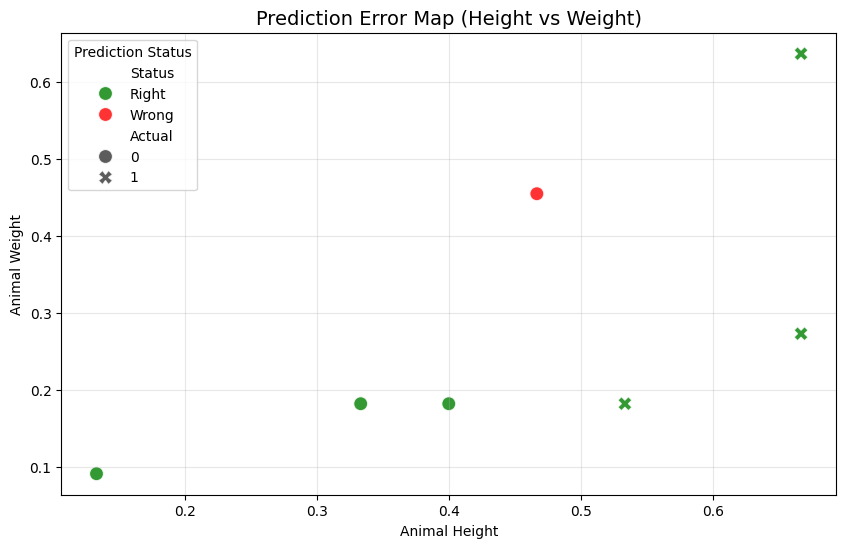

In [196]:
plot_data = pd.DataFrame({
    'Height': X_test.iloc[:, 0], # Kolom ke-0
    'Weight': X_test.iloc[:, 1], # Kolom ke-1
    'Actual': y_test,
    'Prediction': y_pred_test
})

plot_data['Status'] = np.where(plot_data['Actual'] == plot_data['Prediction'], 'Right', 'Wrong')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_data, 
    x='Height', 
    y='Weight', 
    hue='Status',
    style='Actual',
    palette={'Right': 'green', 'Wrong': 'red'},
    s=100,
    alpha=0.8
)

plt.title('Prediction Error Map (Height vs Weight)', fontsize=14)
plt.xlabel('Animal Height')
plt.ylabel('Animal Weight')
plt.legend(title='Prediction Status')
plt.grid(True, alpha=0.3)
plt.show()

#### THIS IS FOR REGRESSION ONLY!!!

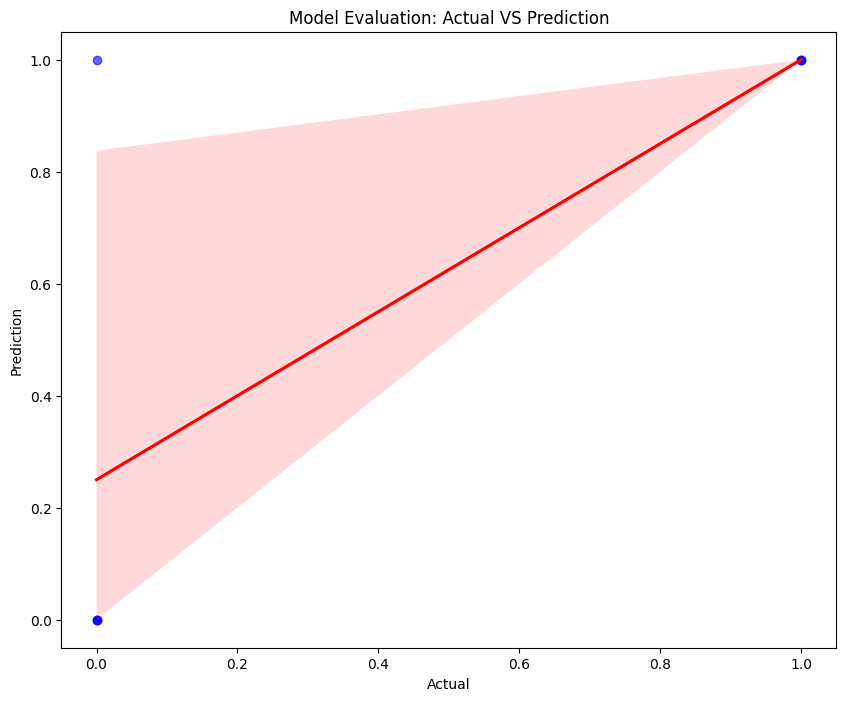

In [167]:
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_pred_test, line_kws={'color' : 'red'}, scatter_kws={'alpha' : 0.6}, color='blue', order=1)
plt.title("Model Evaluation: Actual VS Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()